In [6]:
from sklearn import datasets
import pandas as pd

In [7]:
books_ds = pd.read_csv('books_dataset_v5_titlefixed_titleinfo.csv')

from sklearn.model_selection import train_test_split

X = books_ds[['Number of Pages', 'Subject Place', 'Subject', 'publisher_id', 'publishplace_id', 'dewey_id', 'publisher_freq', 'publish_place_freq', 'dewey_freq', 'author_id', 'author_frequency', 'title_avg_word_len', 'title_num_words']]
#removed publish date
y = books_ds['on_NYT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9804038004750594


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
books_ds_fig = pd.read_csv('books_dataset_v5_titlefixed_titleinfo.csv')
books_ds_fig.head()

,ISBN,Unnamed: 0,Publisher,Dewey,LC,Title,Number of Pages,Publish Place,Subject Place,Subject,...,publishplace_id,dewey_id,publisher_freq,publish_place_freq,dewey_freq,Author,author_id,author_frequency,title_avg_word_len,title_num_words
0,1400052920,0,Harmony Books,823/.914,PR6051.D3352 H5 1979,The hitchhiker's guide to the galaxy,215.0,New York,0.2,30.700000,...,270,324,0,729,89,Douglas Adams,2158,0,5.166667,6
1,076790818X,1,Broadway Books,500,Q162 .B88 2004,A short history of nearly everything,544.0,New York,1.0,0.550000,...,270,275,0,729,0,Bill Bryson,1091,0,5.166667,6
2,076790382X,2,Broadway,NaN,NaN,I'm a stranger here myself,304.0,NaN,0.0,3.000000,...,0,0,0,0,0,Bill Bryson,1091,0,4.400000,5
3,193337201X,3,Europa Editions,NaN,NaN,Cooking With Fernet Branca,281.0,NaN,0.0,19.000000,...,0,0,0,0,0,James Hamilton-Paterson,621,0,5.750000,4
4,097669400X,4,Pragmatic Bookshelf,NaN,NaN,Agile web development with rails,558.0,"Raleigh, N.C",0.0,80.285714,...,295,0,0,0,0,Dave Thomas,1704,0,5.600000,5


In [10]:
subject_score = []
author_frequency = []
publisher_frequency = []
markers = []

for i in range(books_ds_fig.shape[0]):
    subject_score.append(books_ds_fig['Subject'][i])
    author_frequency.append(books_ds_fig['author_frequency'][i])
    publisher_frequency.append(books_ds_fig['publisher_freq'][i])
    if books_ds_fig['on_NYT'][i] == 0:
        markers.append('o')
    elif books_ds_fig['on_NYT'][i] == 1:    
        markers.append('^')

In [11]:
len(subject_score), len(author_frequency), len(publisher_frequency), len(markers) 

(5612, 5612, 5612, 5612)

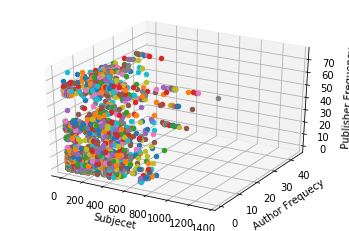

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Subjecet')
ax.set_ylabel('Author Frequecy')
ax.set_zlabel('Publisher Frequency')

for i in range(books_ds.shape[0]):
    ax.scatter(subject_score[i], author_frequency[i], publisher_frequency[i], markers[i])

plt.show()

AttributeError: 'PathCollection' object has no property 'markers'

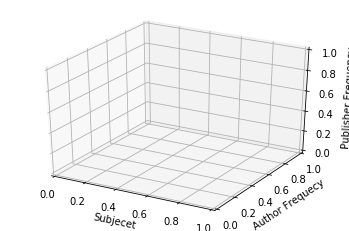

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Subjecet')
ax.set_ylabel('Author Frequecy')
ax.set_zlabel('Publisher Frequency')

ax.scatter([1,1], [1,1], [1,-1], markers=['o', 'v'])

plt.show()

In [13]:
books_ds_fig.head()

,ISBN,Unnamed: 0,Publisher,Dewey,LC,Title,Number of Pages,Publish Place,Subject Place,Subject,...,publishplace_id,dewey_id,publisher_freq,publish_place_freq,dewey_freq,Author,author_id,author_frequency,title_avg_word_len,title_num_words
0,1400052920,0,Harmony Books,823/.914,PR6051.D3352 H5 1979,The hitchhiker's guide to the galaxy,215.0,New York,0.2,30.700000,...,270,324,0,729,89,Douglas Adams,2158,0,5.166667,6
1,076790818X,1,Broadway Books,500,Q162 .B88 2004,A short history of nearly everything,544.0,New York,1.0,0.550000,...,270,275,0,729,0,Bill Bryson,1091,0,5.166667,6
2,076790382X,2,Broadway,NaN,NaN,I'm a stranger here myself,304.0,NaN,0.0,3.000000,...,0,0,0,0,0,Bill Bryson,1091,0,4.400000,5
3,193337201X,3,Europa Editions,NaN,NaN,Cooking With Fernet Branca,281.0,NaN,0.0,19.000000,...,0,0,0,0,0,James Hamilton-Paterson,621,0,5.750000,4
4,097669400X,4,Pragmatic Bookshelf,NaN,NaN,Agile web development with rails,558.0,"Raleigh, N.C",0.0,80.285714,...,295,0,0,0,0,Dave Thomas,1704,0,5.600000,5


In [16]:
import numpy as np
from numpy import linalg

In [22]:
books_ds_fig['Subject'] = books_ds_fig['Subject'] / books_ds_fig['Subject'].max()
books_ds_fig['publisher_freq'] = books_ds_fig['publisher_freq'] / books_ds_fig['publisher_freq'].max()
books_ds_fig['author_frequency'] = books_ds_fig['author_frequency'] / books_ds_fig['author_frequency'].max()

In [24]:
books_ds_fig

,ISBN,Unnamed: 0,Publisher,Dewey,LC,Title,Number of Pages,Publish Place,Subject Place,Subject,...,publishplace_id,dewey_id,publisher_freq,publish_place_freq,dewey_freq,Author,author_id,author_frequency,title_avg_word_len,title_num_words
0,1400052920,0,Harmony Books,823/.914,PR6051.D3352 H5 1979,The hitchhiker's guide to the galaxy,215.000000,New York,0.200000,0.023013,...,270,324,0.000000,729,89,Douglas Adams,2158,0.000000,5.166667,6
1,076790818X,1,Broadway Books,500,Q162 .B88 2004,A short history of nearly everything,544.000000,New York,1.000000,0.000412,...,270,275,0.000000,729,0,Bill Bryson,1091,0.000000,5.166667,6
2,076790382X,2,Broadway,NaN,NaN,I'm a stranger here myself,304.000000,NaN,0.000000,0.002249,...,0,0,0.000000,0,0,Bill Bryson,1091,0.000000,4.400000,5
3,193337201X,3,Europa Editions,NaN,NaN,Cooking With Fernet Branca,281.000000,NaN,0.000000,0.014243,...,0,0,0.000000,0,0,James Hamilton-Paterson,621,0.000000,5.750000,4
4,097669400X,4,Pragmatic Bookshelf,NaN,NaN,Agile web development with rails,558.000000,"Raleigh, N.C",0.000000,0.060184,...,295,0,0.000000,0,0,Dave Thomas,1704,0.000000,5.600000,5
5,1557344493,5,Teacher Created Resources,NaN,NaN,A Guide for Using Hatchet in the Classroom,48.000000,NaN,0.000000,0.000000,...,0,0,0.000000,0,0,Gary Paulsen,1134,0.000000,4.375000,8
6,1575606240,6,Cherry Lane Music,NaN,NaN,Molly Hatchet - 5 of the Best,56.000000,NaN,0.000000,0.000000,...,0,0,0.000000,0,0,Molly Hatchet,1612,0.000000,3.285714,7
7,1595580271,7,New Press,NaN,NaN,Hatchet Jobs,240.000000,NaN,0.000000,0.100450,...,0,0,0.000000,0,0,Dale Peck,820,0.000000,5.500000,2
8,1595962808,8,Changeling Press LLC,NaN,NaN,A Changeling For All Seasons,304.000000,NaN,0.000000,0.000000,...,0,0,0.000000,0,0,Angela Knight,2263,0.000000,4.800000,5
9,1590301943,9,Shambhala,NaN,NaN,The Changeling,352.000000,NaN,0.000000,0.000000,...,0,0,0.000000,0,0,Kate Horsley,280,0.000000,6.500000,2
